In [102]:
import pandas as pd
import numpy as np

In [173]:
df=pd.read_excel("Influencer.xlsx")
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [174]:
df.shape

(200, 10)

In [175]:
df.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers               object
Avg. Likes              object
Posts                   object
60-Day Eng Rate        float64
New Post Avg. Likes     object
Total Likes             object
Country Or Region       object
dtype: object

In [176]:
df.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [177]:
df["Country Or Region"].value_counts()

United States             65
Brazil                    13
India                     12
Indonesia                  7
France                     6
Spain                      5
United Kingdom             4
Colombia                   3
Canada                     3
Mexico                     2
Turkey                     2
Netherlands                2
Switzerland                1
Germany                    1
Czech Republic             1
British Virgin Islands     1
Sweden                     1
Australia                  1
Anguilla                   1
CÃ´te d'Ivoire             1
Puerto Rico                1
United Arab Emirates       1
Italy                      1
Uruguay                    1
Russia                     1
Name: Country Or Region, dtype: int64

In [178]:
df["Country Or Region"].fillna("United States",inplace=True)

In [179]:
df.isnull().sum()

Rank                   0
Channel Info           0
Influence Score        0
Followers              0
Avg. Likes             0
Posts                  0
60-Day Eng Rate        0
New Post Avg. Likes    0
Total Likes            0
Country Or Region      0
dtype: int64

In [180]:
df["Country Or Region"].value_counts()

United States             128
Brazil                     13
India                      12
Indonesia                   7
France                      6
Spain                       5
United Kingdom              4
Colombia                    3
Canada                      3
Mexico                      2
Turkey                      2
Netherlands                 2
Switzerland                 1
Germany                     1
Czech Republic              1
British Virgin Islands      1
Sweden                      1
Australia                   1
Anguilla                    1
CÃ´te d'Ivoire              1
Puerto Rico                 1
United Arab Emirates        1
Italy                       1
Uruguay                     1
Russia                      1
Name: Country Or Region, dtype: int64

In [181]:
df["Followers"]

0      485.2m
1      370.7m
2      363.9m
3      348.8m
4      339.4m
        ...  
195     33.6m
196     33.6m
197     33.6m
198     33.5m
199     33.4m
Name: Followers, Length: 200, dtype: object

In [182]:
df["Avg. Likes"]

0        8.7m
1        8.2m
2        6.7m
3        6.1m
4        1.8m
        ...  
195    680.6k
196      2.2m
197    227.8k
198    193.3k
199    382.5k
Name: Avg. Likes, Length: 200, dtype: object

In [183]:
df["Total Likes"]

0       29.1b
1       57.4b
2        6.1b
3       11.4b
4       12.6b
        ...  
195      3.1b
196      3.0b
197    955.9m
198    167.2m
199      1.5b
Name: Total Likes, Length: 200, dtype: object

In [184]:
df["New Post Avg. Likes"]

0        6.3m
1        5.0m
2        3.5m
3        1.7m
4      932.0k
        ...  
195    305.7k
196      2.1m
197    103.2k
198     82.6k
199    128.2k
Name: New Post Avg. Likes, Length: 200, dtype: object

In [185]:
df["Posts"]

0      3.4k
1      7.0k
2       915
3      1.9k
4      6.8k
       ... 
195    4.6k
196    1.4k
197    4.2k
198     865
199    3.8k
Name: Posts, Length: 200, dtype: object

In [186]:
for i in range(0,200):
    if df["Total Likes"][i][-1] == "b":
        df["Total Likes"][i] = df["Total Likes"][i].replace("b","")
        df["Total Likes"][i] = float(df["Total Likes"][i])*1_000_000_000_000 #i think its a billion
    elif df["Total Likes"][i][-1] == "m":
        df["Total Likes"][i] = df["Total Likes"][i].replace("m","")
        df["Total Likes"][i] = float(df["Total Likes"][i])*1_000_000 #i think its a million
    elif df["Total Likes"][i][-1] == "k":
        df["Total Likes"][i] = df["Total Likes"][i].replace("k","")
        df["Total Likes"][i] = float(df["Total Likes"][i])*1_000 #deffo a thousand
        
df["Total Likes"] = df["Total Likes"].astype(float)

for i in range(0,200):
    if df["Followers"][i][-1] == "b":
        df["Followers"][i] = df["Followers"][i].replace("b","")
        df["Followers"][i] = float(df["Followers"][i])*1_000_000_000_000 #i think its a billion
    elif df["Followers"][i][-1] == "m":
        df["Followers"][i] = df["Followers"][i].replace("m","")
        df["Followers"][i] = float(df["Followers"][i])*1_000_000 #i think its a million
    elif df["Followers"][i][-1] == "k":
        df["Followers"][i] = df["Followers"][i].replace("k","")
        df["Followers"][i] = float(df["Followers"][i])*1_000 #deffo a thousand
        
df["Followers"] = df["Followers"].astype(int)

df["New Post Avg. Likes"]=df["New Post Avg. Likes"].astype(str)
for i in range(0,200):
    if df["New Post Avg. Likes"][i][-1] == "b":
        df["New Post Avg. Likes"][i] = df["New Post Avg. Likes"][i].replace("b","")
        df["New Post Avg. Likes"][i] = float(df["New Post Avg. Likes"][i])*1_000_000_000_000 #i think its a billion
    elif df["New Post Avg. Likes"][i][-1] == "m":
        df["New Post Avg. Likes"][i] = df["New Post Avg. Likes"][i].replace("m","")
        df["New Post Avg. Likes"][i] = float(df["New Post Avg. Likes"][i])*1_000_000 #i think its a million
    elif df["New Post Avg. Likes"][i][-1] == "k":
        df["New Post Avg. Likes"][i] = df["New Post Avg. Likes"][i].replace("k","")
        df["New Post Avg. Likes"][i] = float(df["New Post Avg. Likes"][i])*1_000 #deffo a thousand
        
df["New Post Avg. Likes"] = df["New Post Avg. Likes"].astype(int)

for i in range(0,200):
    if df["Avg. Likes"][i][-1] == "b":
        df["Avg. Likes"][i] = df["Avg. Likes"][i].replace("b","")
        df["Avg. Likes"][i] = float(df["Avg. Likes"][i])*1_000_000_000_000 #i think its a billion
    elif df["Avg. Likes"][i][-1] == "m":
        df["Avg. Likes"][i] = df["Avg. Likes"][i].replace("m","")
        df["Avg. Likes"][i] = float(df["Avg. Likes"][i])*1_000_000 #i think its a million
    elif df["Avg. Likes"][i][-1] == "k":
        df["Avg. Likes"][i] = df["Avg. Likes"][i].replace("k","")
        df["Avg. Likes"][i] = float(df["Avg. Likes"][i])*1_000 #deffo a thousand
        
df["Avg. Likes"] = df["Avg. Likes"].astype(int)

df["Posts"]=df["Posts"].astype(str)
for i in range(0,200):
    if df["Posts"][i][-1] == "b":
        df["Posts"][i] = df["Posts"][i].replace("b","")
        df["Posts"][i] = float(df["Posts"][i])*1_000_000_000_000 #i think its a billion
    elif df["Posts"][i][-1] == "m":
        df["Posts"][i] = df["Posts"][i].replace("m","")
        df["Posts"][i] = float(df["Posts"][i])*1_000_000 #i think its a million
    elif df["Posts"][i][-1] == "k":
        df["Posts"][i] = df["Posts"][i].replace("k","")
        df["Posts"][i] = float(df["Posts"][i])*1_000 #deffo a thousand
        
df["Posts"] = df["Posts"].astype(int)

C:\Users\ACER\AppData\Local\Temp\ipykernel_7904\1575440511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Likes"][i] = df["Total Likes"][i].replace("b","")
C:\Users\ACER\AppData\Local\Temp\ipykernel_7904\1575440511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Likes"][i] = float(df["Total Likes"][i])*1_000_000_000_000 #i think its a billion
C:\Users\ACER\AppData\Local\Temp\ipykernel_7904\1575440511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [187]:
df.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers                int32
Avg. Likes               int32
Posts                    int32
60-Day Eng Rate        float64
New Post Avg. Likes      int32
Total Likes            float64
Country Or Region       object
dtype: object

In [188]:
df["Followers"]

0      485200000
1      370700000
2      363900000
3      348800000
4      339400000
         ...    
195     33600000
196     33600000
197     33600000
198     33500000
199     33400000
Name: Followers, Length: 200, dtype: int32

In [189]:
print(df["Posts"])
#df["Posts"].dtypes

0      3400
1      7000
2       915
3      1900
4      6800
       ... 
195    4600
196    1400
197    4200
198     865
199    3800
Name: Posts, Length: 200, dtype: int32


In [190]:
df["Avg. Likes"]


0      8700000
1      8199999
2      6700000
3      6100000
4      1800000
        ...   
195     680600
196    2200000
197     227800
198     193300
199     382500
Name: Avg. Likes, Length: 200, dtype: int32

In [30]:
# Create the conversion function
'''def converter(x):
    if 'm' in x:
        return f"{(float(x.strip('m'))*1000000):,.2f}"
    elif 'b' in x:
        return f"{(float(x.strip('b'))*1000000000):,.2f}"
    elif 'k' in x:
        return f"{(float(x.strip('k'))*1000):,.2f}"

# Print first 20 rows of head to see current values
print(df.Followers.head(200))'''

0      485200000
1      370700000
2      363900000
3      348800000
4      339400000
         ...    
195     33600000
196     33600000
197     33600000
198     33500000
199     33400000
Name: Followers, Length: 200, dtype: int32


In [191]:
#df["Followers"]=df.Followers
df.head()
# Print first 20 rows of head to see modified values
#print(df.Followers.head(20))

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000,8700000,3400,0.013,6300000,2.910000e+13,Spain
1,2,kyliejenner,91,370700000,8199999,7000,0.014,5000000,5.740000e+13,United States
2,3,\nleomessi,90,363900000,6700000,915,0.010,3500000,6.100000e+12,United States
3,4,\nselenagomez,93,348800000,6100000,1900,0.005,1700000,1.140000e+13,United States
4,5,\ntherock,91,339400000,1800000,6800,0.003,932000,1.260000e+13,United States


In [24]:
#df["Followers"]=df["Followers"].apply(lambda x: x.replace("k"," "))

In [41]:
#df["Avg. Likes"]=df["Avg. Likes"].apply(lambda x: x.replace("m"," "))

In [32]:
#df["Total Likes"]=df["Total Likes"].apply(lambda x: x.replace("b"," "))

In [ ]:
#df["Total Likes"]=df["Total Likes"].apply(lambda x: x.replace("b"," "))

In [192]:
print("Shape of Dataset:- ",df.shape)
df.head().style.background_gradient(cmap='YlOrRd')

Shape of Dataset:-  (200, 10)


,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485200000,8700000,3400,0.013000,6300000,29100000000000.000000,Spain
1,2,kyliejenner,91,370700000,8199999,7000,0.014000,5000000,57400000000000.000000,United States
2,3,leomessi,90,363900000,6700000,915,0.010000,3500000,6100000000000.000000,United States
3,4,selenagomez,93,348800000,6100000,1900,0.005000,1700000,11400000000000.000000,United States
4,5,therock,91,339400000,1800000,6800,0.003000,932000,12600000000000.000000,United States


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    int32  
 4   Avg. Likes           200 non-null    int32  
 5   Posts                200 non-null    int32  
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    int32  
 8   Total Likes          200 non-null    float64
 9   Country Or Region    200 non-null    object 
dtypes: float64(2), int32(4), int64(2), object(2)
memory usage: 12.6+ KB


In [194]:
df.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers                int32
Avg. Likes               int32
Posts                    int32
60-Day Eng Rate        float64
New Post Avg. Likes      int32
Total Likes            float64
Country Or Region       object
dtype: object

In [195]:
df.corr()

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
Rank,1.000000,-0.354843,-0.698193,-0.277699,-0.058132,0.028900,-0.272323,-0.473344
Influence Score,-0.354843,1.000000,0.365428,0.048502,0.168287,-0.072460,0.040011,0.233932
Followers,-0.698193,0.365428,1.000000,0.346829,0.069171,-0.107439,0.260764,0.668374
Avg. Likes,-0.277699,0.048502,0.346829,1.000000,-0.348795,0.789359,0.892784,0.361890
Posts,-0.058132,0.168287,0.069171,-0.348795,1.000000,-0.334047,-0.285154,0.239246
60-Day Eng Rate,0.028900,-0.072460,-0.107439,0.789359,-0.334047,1.000000,0.866293,0.000420
New Post Avg. Likes,-0.272323,0.040011,0.260764,0.892784,-0.285154,0.866293,1.000000,0.353018
Total Likes,-0.473344,0.233932,0.668374,0.361890,0.239246,0.000420,0.353018,1.000000


, 
# Followers and Rank are Highly Negatively Corelated.

# Followers and Total Likes are Highly positively corelated.

# Avgerage Likes - 60 Day Eng Rate and New Post Average Likes are highly corelated.



In this Instagram Influencer dataset,
For Rank - Influence Score , Folloers , Total Likes are negatively corelated.

For Influence Score - Followers and Total Likes are slitely corelated.

For Followers - Rank is highly negatively corelated, Total Likes is positively corelated,Avg likea and New Posts Avg Likes are Slightly Corelated.

For 60-Day Eng Rate - Average Likes and New Posts Average Likes are Highly Corelated and vice Versa.


For Total Likes - Rank - negatively corelated, Followers positively corelated, Influence Score is very slitely corelated..

In [196]:
df.describe()

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
count,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,2.000000e+02,2.000000e+02
mean,100.500000,81.850000,7.849100e+07,1.785050e+06,3460.425000,0.019160,1.224083e+06,3.514630e+12
std,57.879185,8.875323,7.492015e+07,2.192133e+06,3327.882197,0.032577,1.857624e+06,5.638892e+12
min,1.000000,22.000000,3.340000e+07,6.350000e+04,20.000000,0.000000,0.000000e+00,2.280000e+07
25%,50.750000,80.000000,4.067500e+07,4.990500e+05,938.250000,0.004000,2.187750e+05,1.075000e+12
50%,100.500000,84.000000,5.095000e+07,1.100000e+06,2100.000000,0.009500,5.671500e+05,2.050000e+12
75%,150.250000,86.000000,7.050000e+07,2.125000e+06,5025.000000,0.017250,1.300000e+06,4.025000e+12
max,200.000000,93.000000,4.852000e+08,1.540000e+07,16900.000000,0.250000,1.290000e+07,5.740000e+13


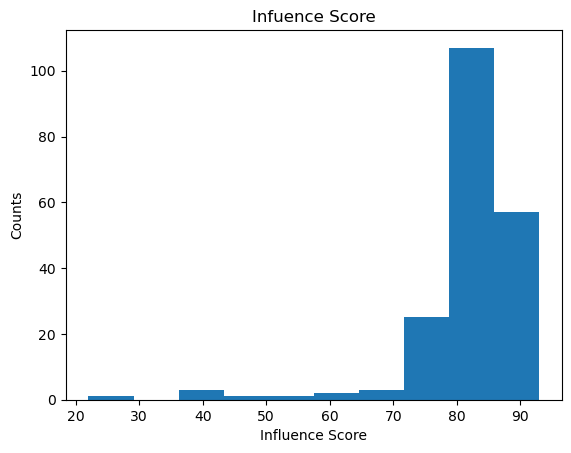

In [201]:
import matplotlib.pyplot as plt
plt.title("Infuence Score")
plt.xlabel("Influence Score")
plt.ylabel("Counts")
plt.hist(df["Influence Score"])
plt.show()

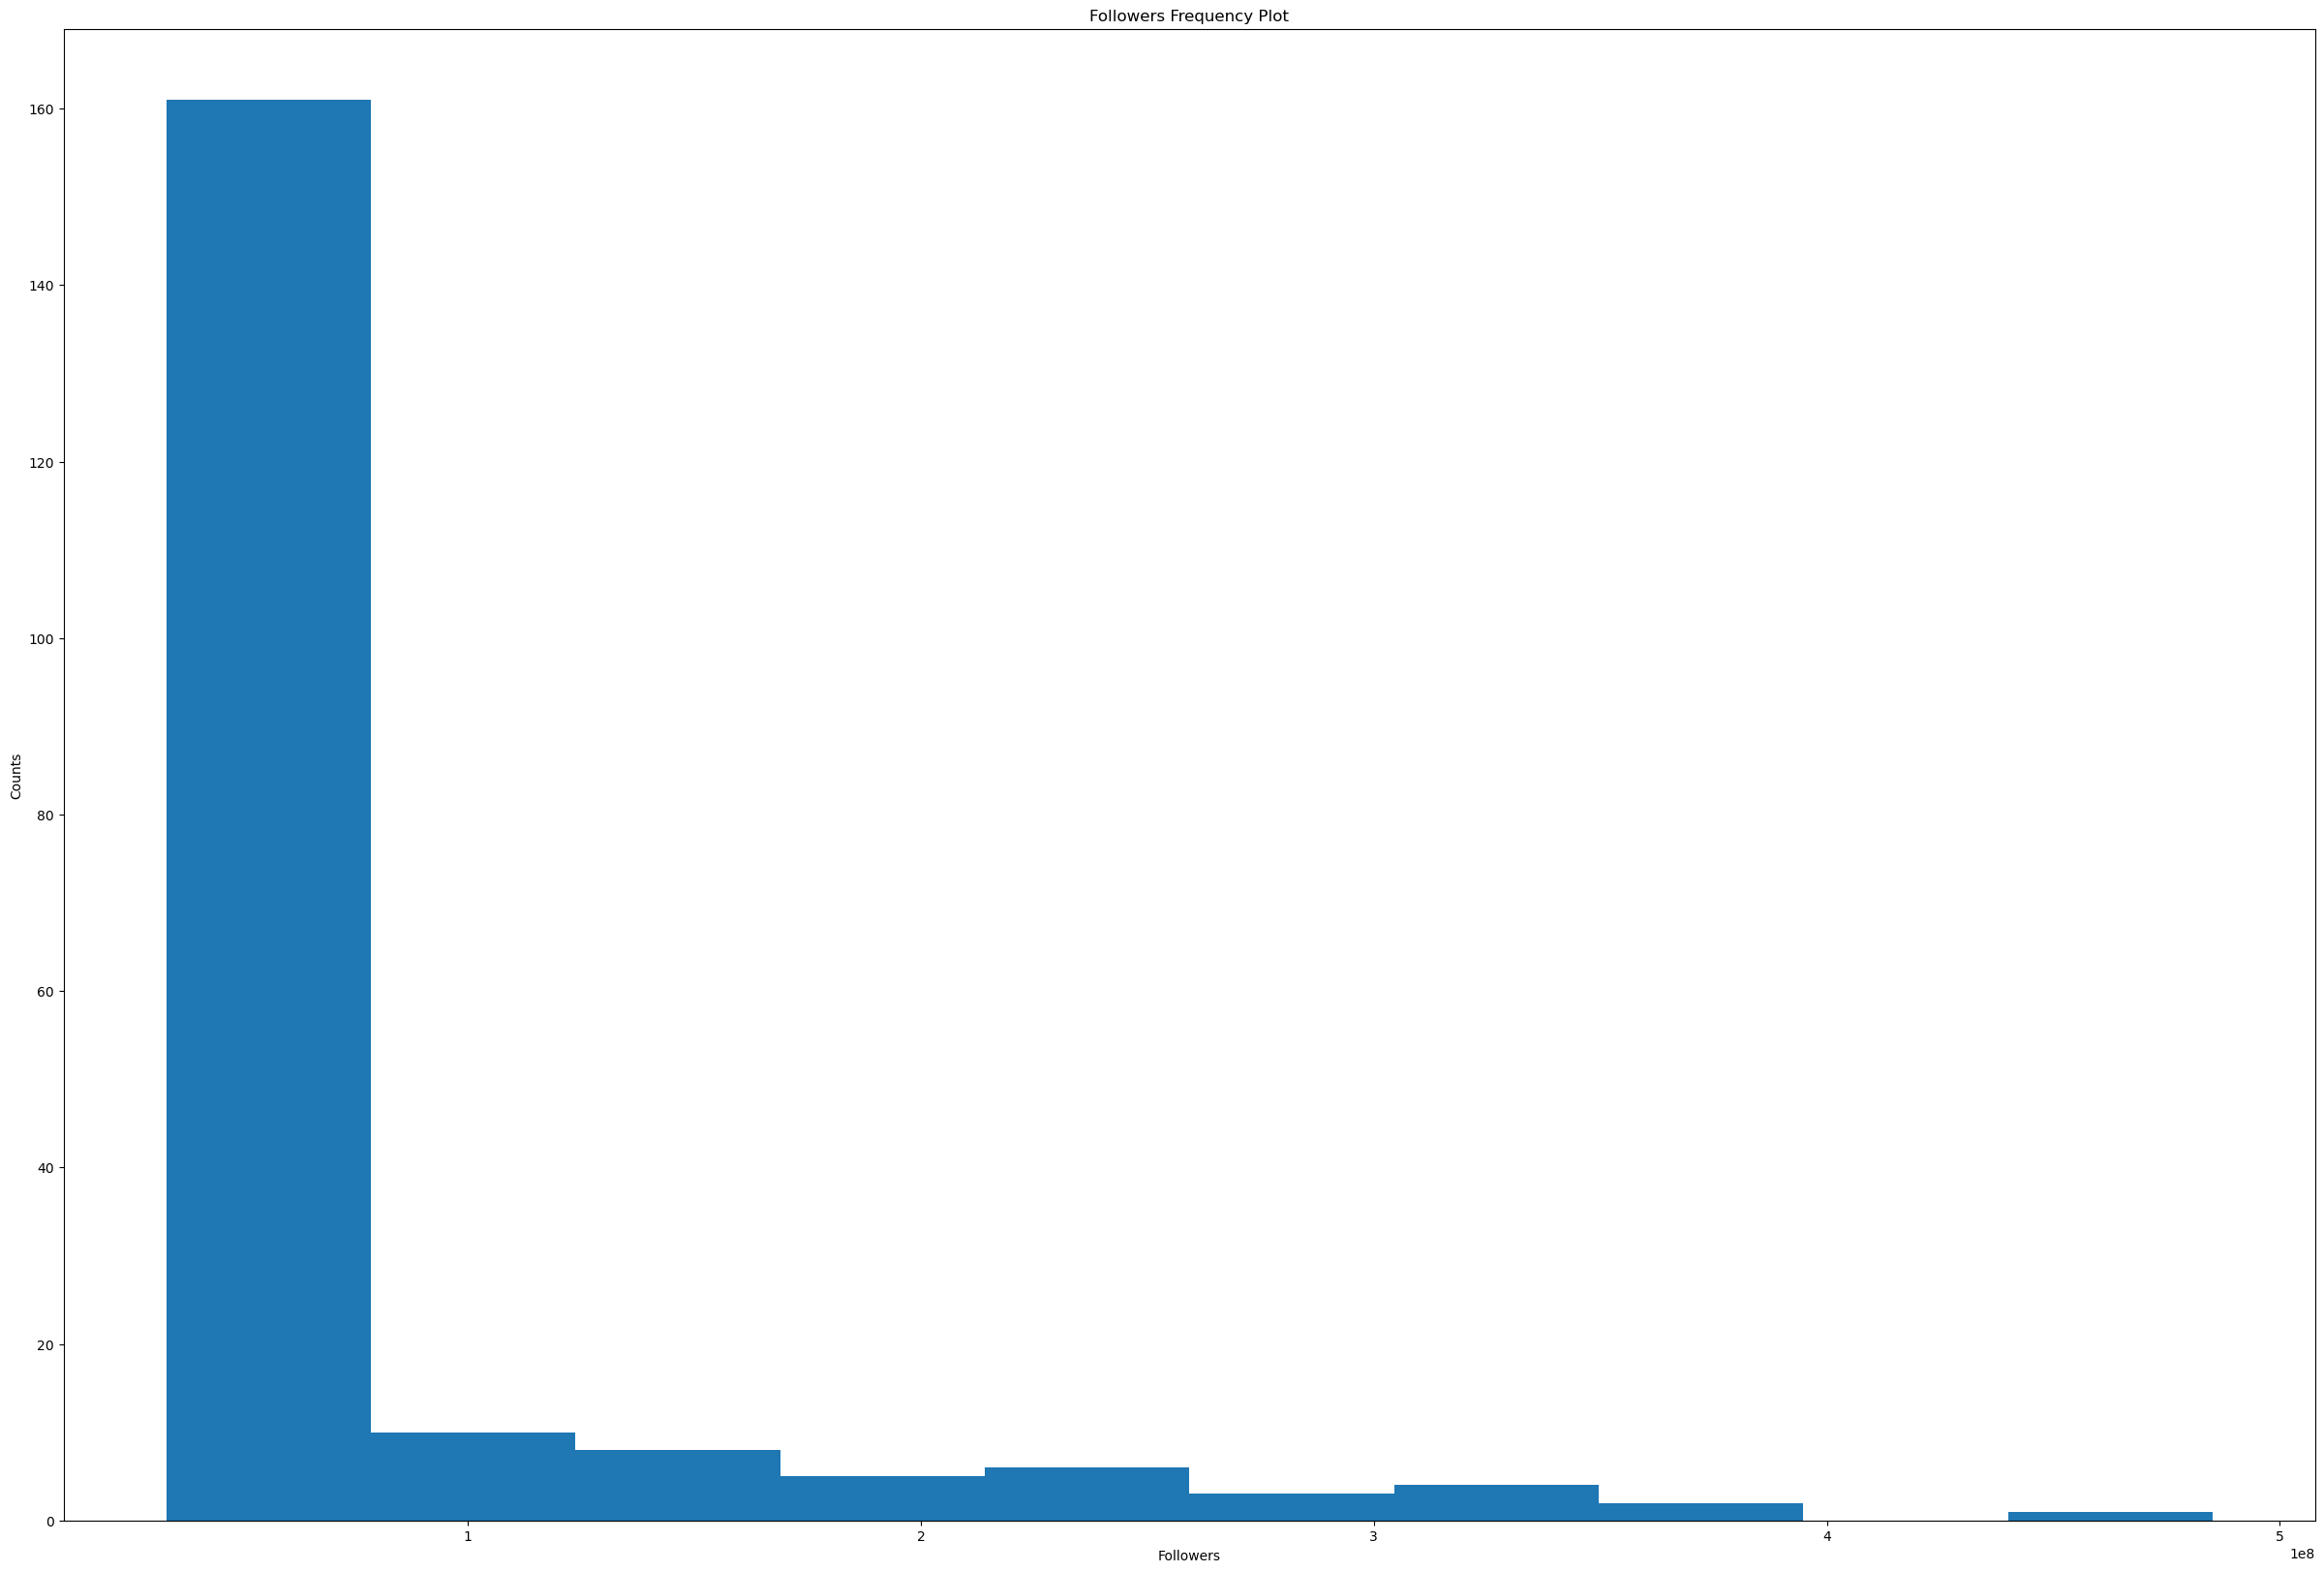

In [202]:
plt.figure(figsize=(30,20))
plt.title("Followers Frequency Plot")
plt.xlabel("Followers")
plt.ylabel("Counts")
plt.hist(df["Followers"])
plt.show()

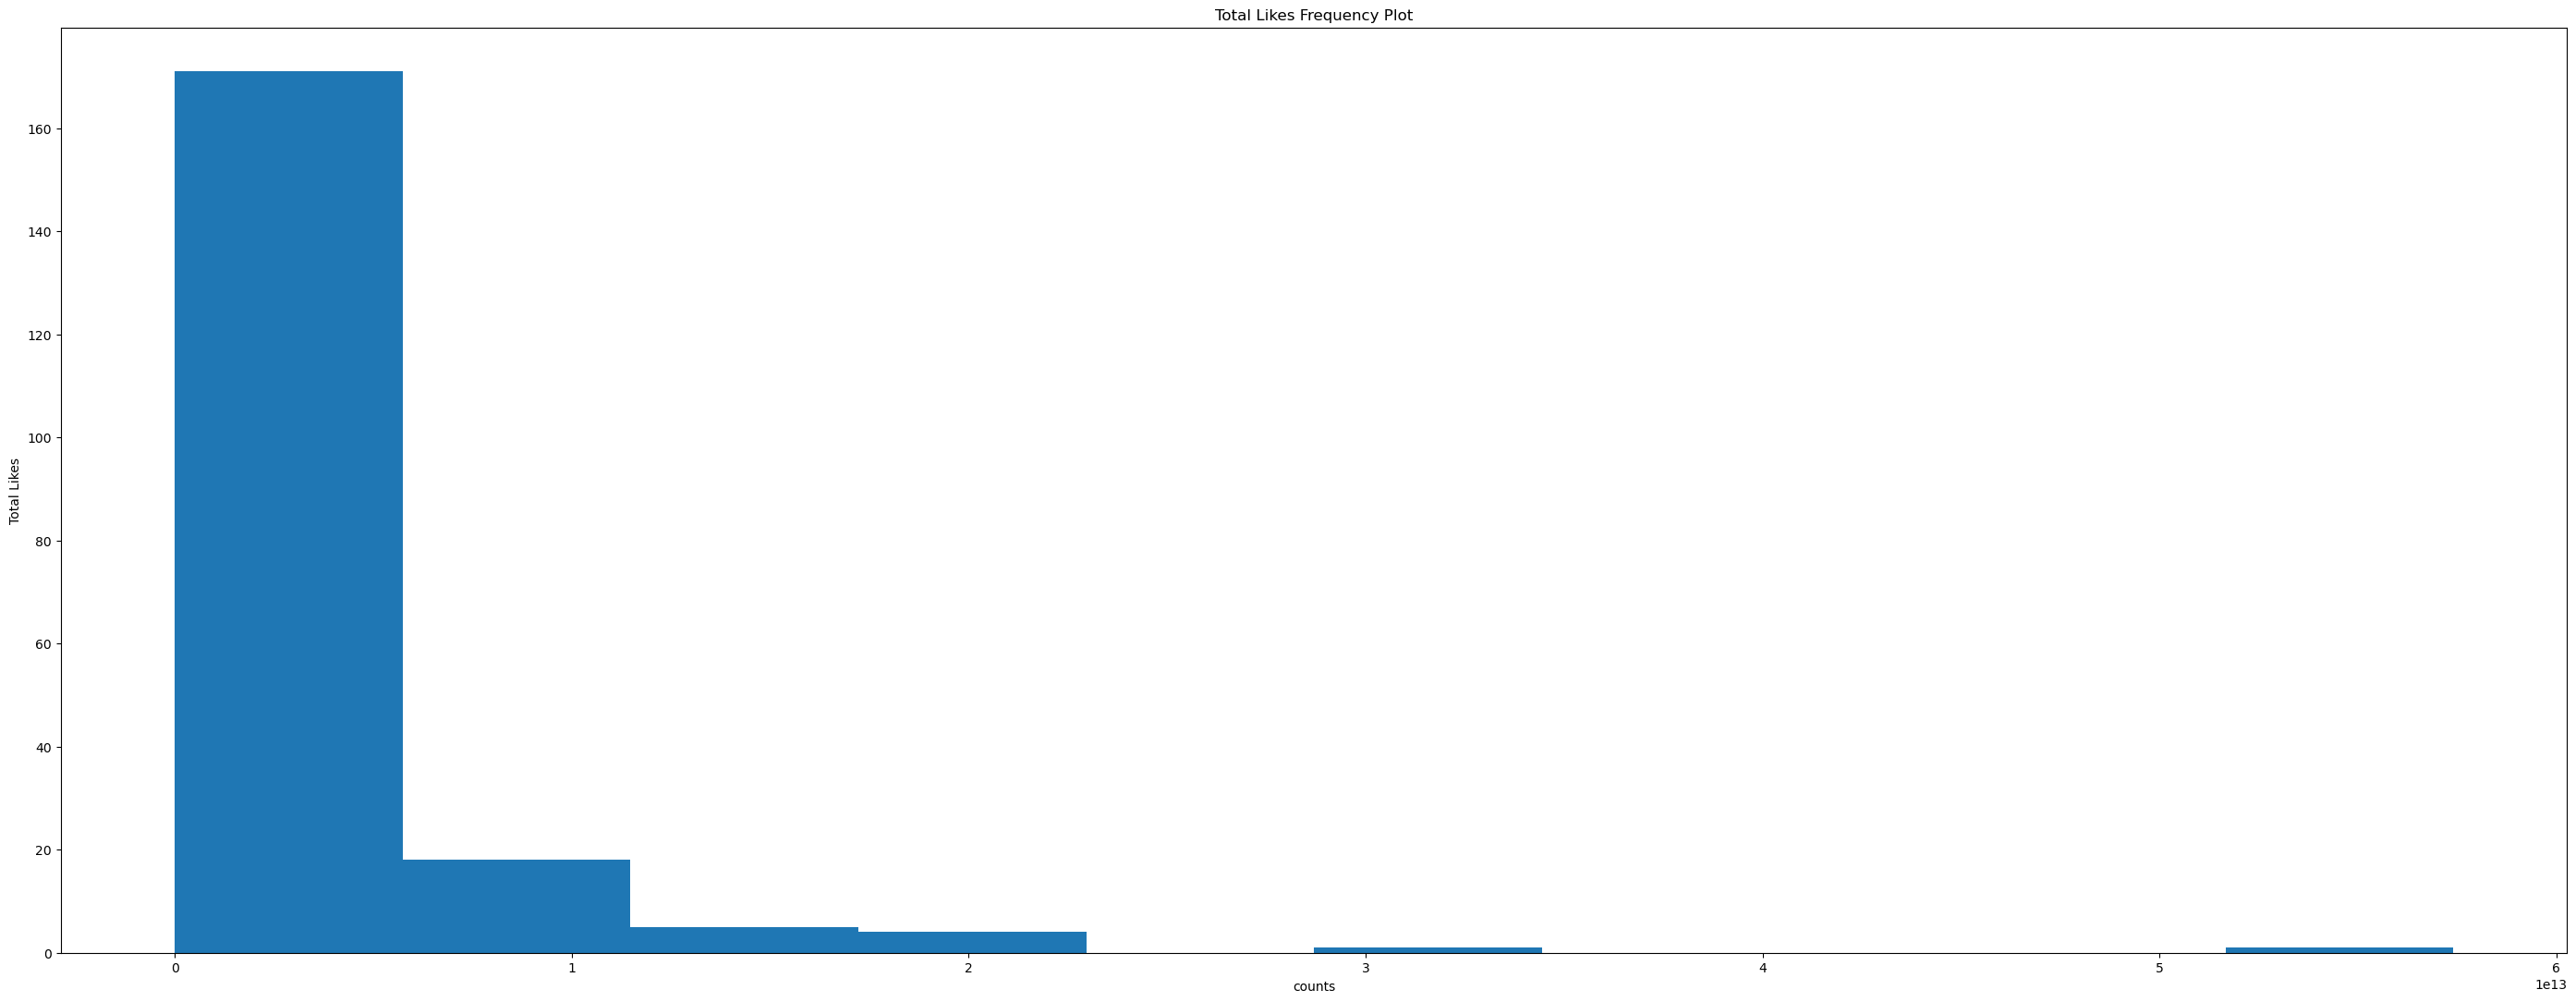

In [203]:
plt.figure(figsize=(35,13))
plt.title("Total Likes Frequency Plot")
plt.xlabel("counts")
plt.ylabel("Total Likes")
plt.hist(df["Total Likes"])
plt.show()

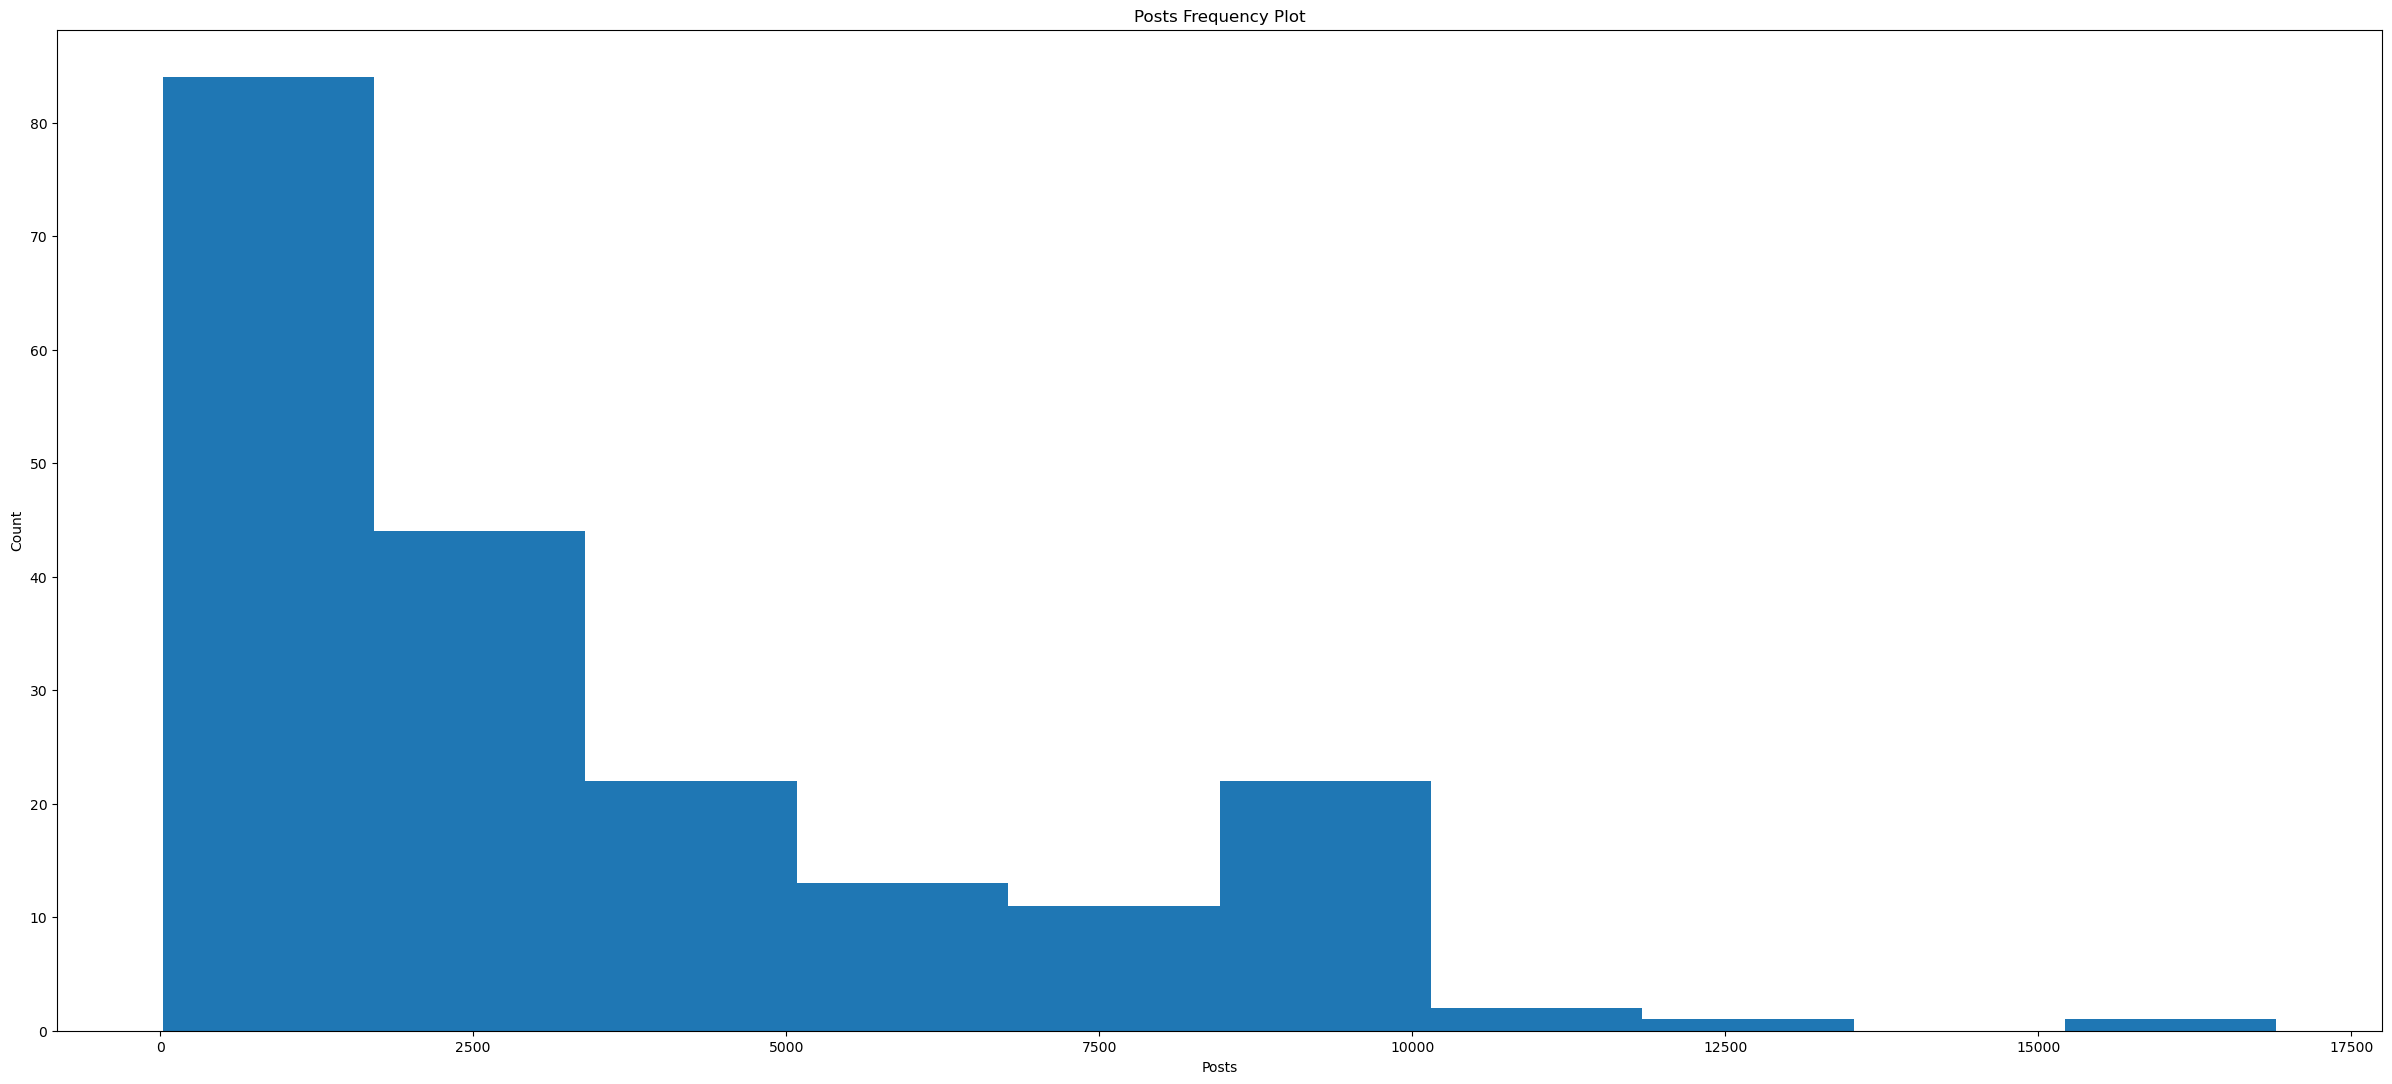

In [243]:
plt.figure(figsize=(30,13))
plt.title("Posts Frequency Plot")

plt.hist(df["Posts"])
plt.xlabel("Posts")
plt.ylabel("Count")
plt.show()

In [21]:
df["Posts"].value_counts()

10.0k    11
1.2k      9
1.9k      5
2.0k      5
9.9k      4
         ..
899       1
290       1
10.1k     1
8.2k      1
3.8k      1
Name: Posts, Length: 121, dtype: int64

<AxesSubplot:xlabel='Country Or Region', ylabel='Influence Score'>

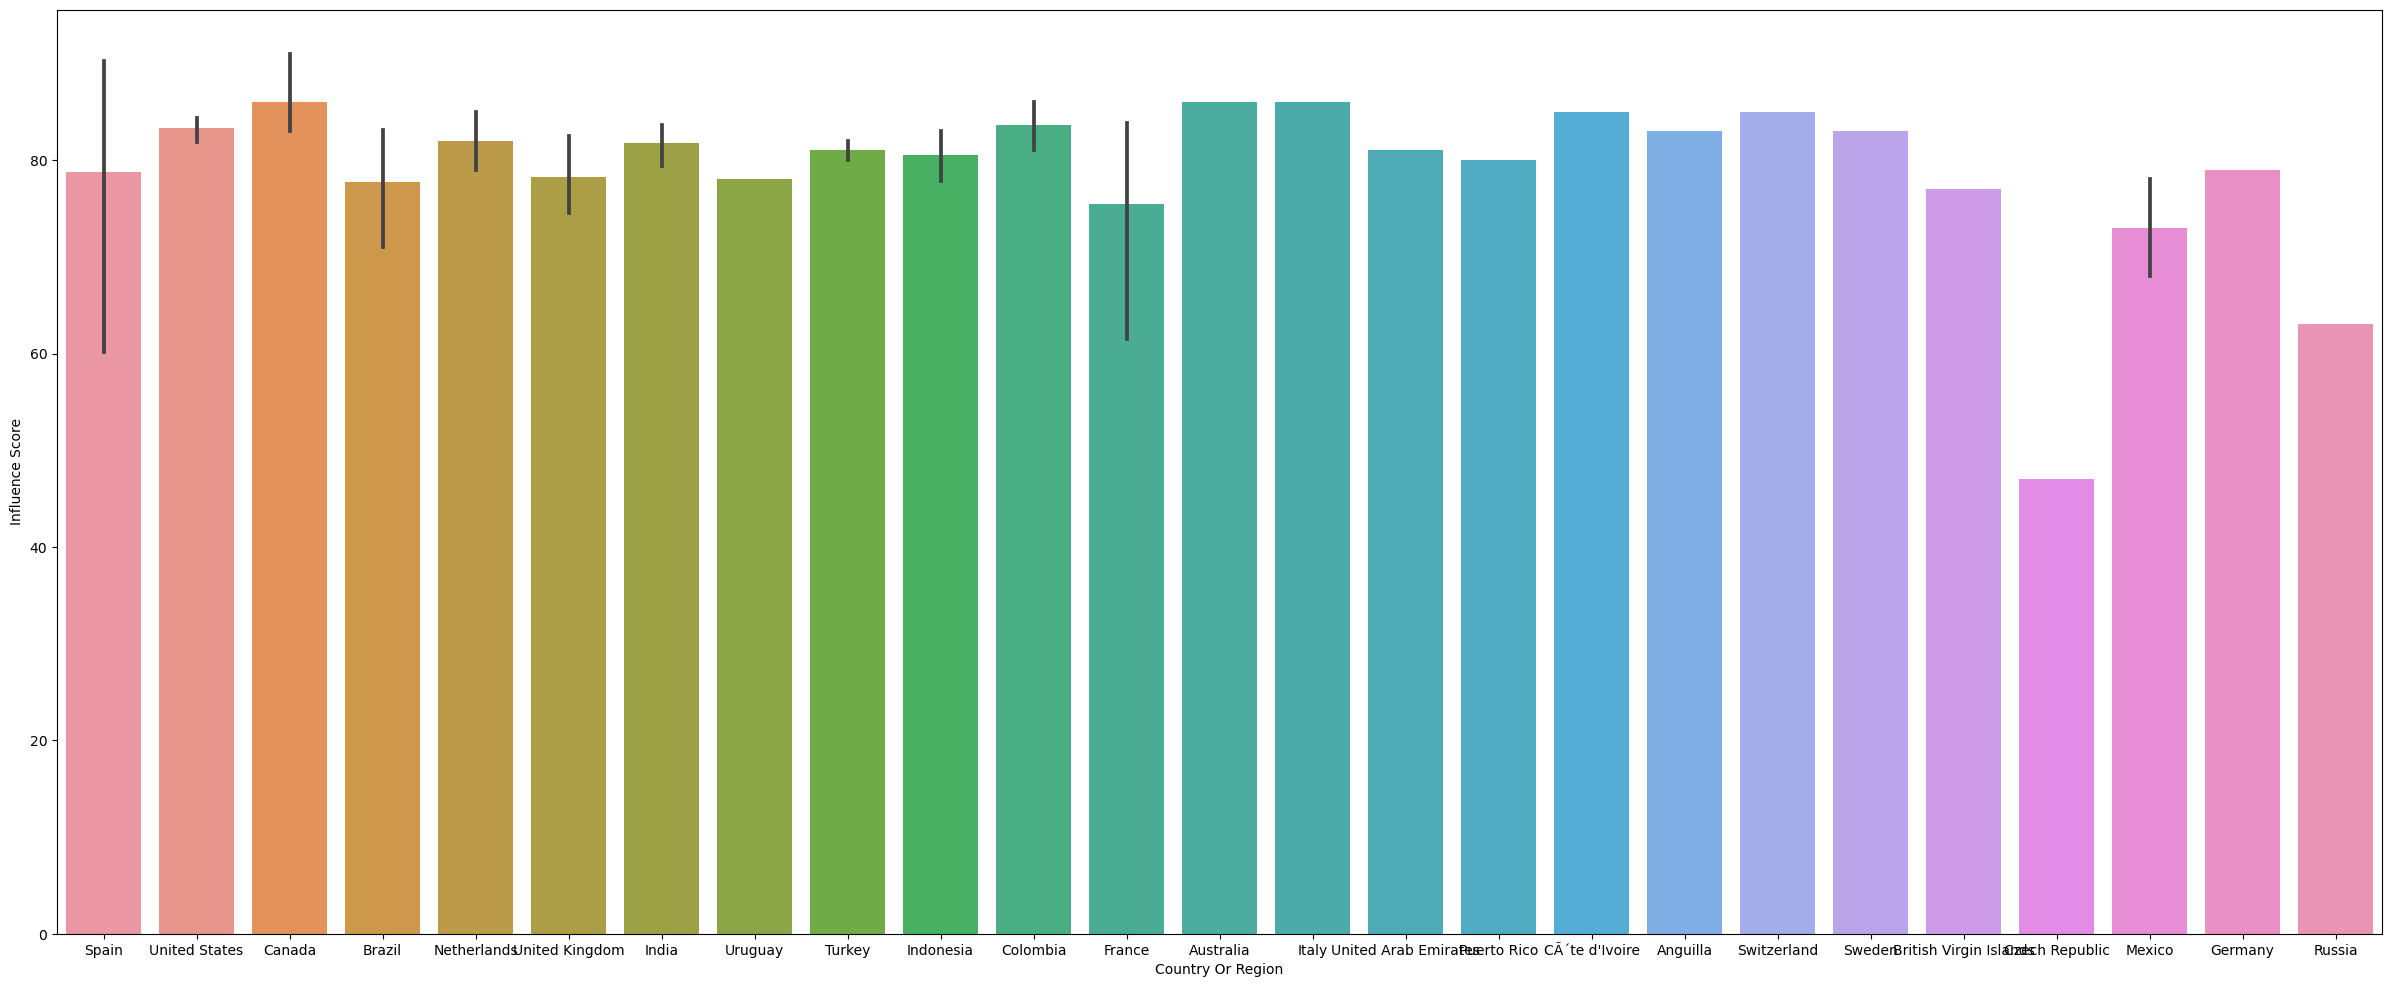

In [69]:
import seaborn as sns
plt.figure(figsize=(30,12))
sns.barplot(x="Country Or Region",y="Influence Score",data=df)

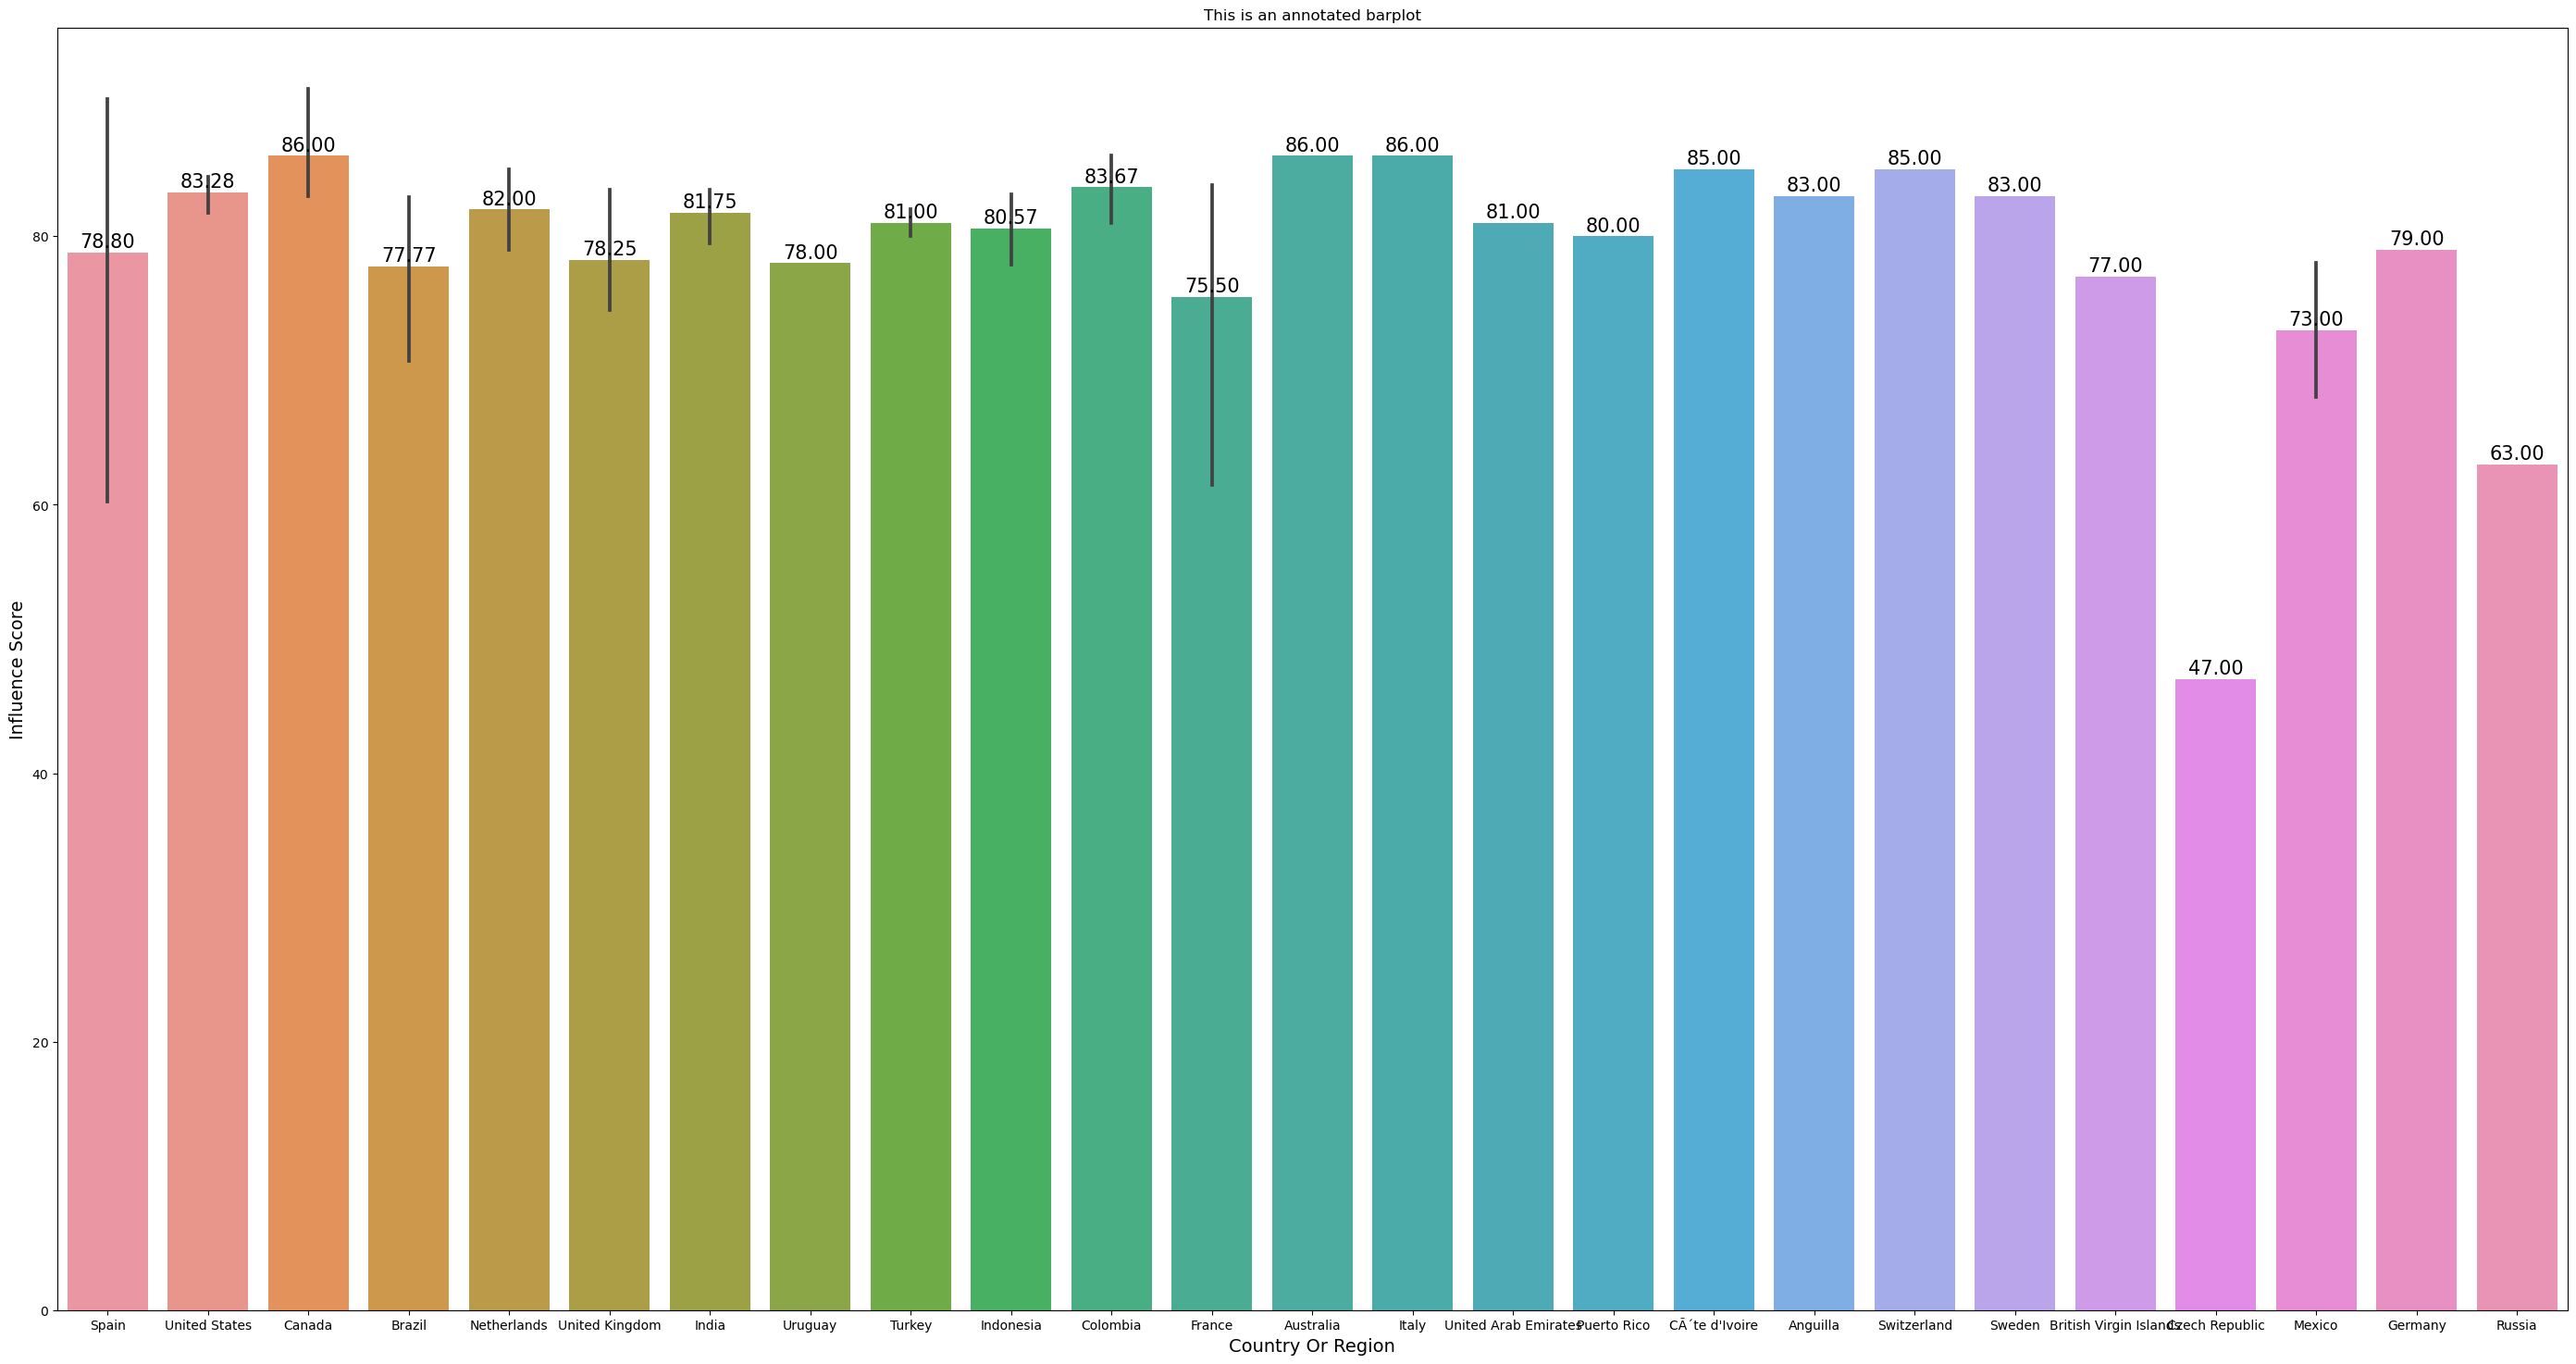

In [242]:
plt.figure(figsize=(35,18))
 
# Defining the values for x-axis, y-axis and from which dataframe the values are to be picked
plots = sns.barplot(x="Country Or Region", y="Influence Score", data=df)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Country Or Region", size=14)
 
# Setting the label for y-axis
plt.ylabel("Influence Score", size=14)
 
# Setting the title for the graph
plt.title("This is an annotated barplot")
 
# Finally showing the plot
plt.show()

This above graph shows, Countries -- Canada , Australia and Italy are having  Highest influence Score, followed By Switzerland , United States have Highest Influence Scores.

<AxesSubplot:>

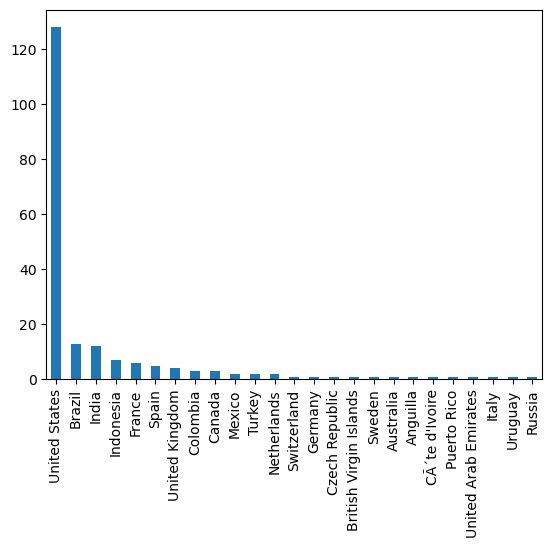

In [73]:
df['Country Or Region'].value_counts().plot(kind='bar')

In [212]:
top10 = df.sort_values(by="Influence Score", ascending=True).tail(10).reset_index(drop=True)
top10 # based on Influence score.

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,14,\ntaylorswift,91,226100000,2400000,542,0.015,3300000,1.300000e+12,United States
1,7,\nkimkardashian,91,330700000,3500000,5700,0.005,1700000,1.980000e+13,United States
2,5,\ntherock,91,339400000,1800000,6800,0.003,932000,1.260000e+13,United States
3,2,kyliejenner,91,370700000,8199999,7000,0.014,5000000,5.740000e+13,United States
4,10,\njustinbieber,91,260000000,1900000,7400,0.007,1700000,1.400000e+13,Canada
5,8,\nbeyonce,92,276100000,3600000,2000,0.008,2200000,7.300000e+12,United States
6,6,\narianagrande,92,333000000,3700000,5000,0.009,3100000,1.850000e+13,United States
7,21,\nkatyperry,92,173300000,714800,2100,0.002,302900,1.500000e+12,United States
8,1,\ncristiano,92,485200000,8700000,3400,0.013,6300000,2.910000e+13,Spain
9,4,\nselenagomez,93,348800000,6100000,1900,0.005,1700000,1.140000e+13,United States


In [213]:
top10 = df.sort_values(by="Followers", ascending=True).tail(10).reset_index(drop=True)
top10 #  based on Followers.

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,10,\njustinbieber,91,260000000,1900000,7400,0.007,1700000,1.400000e+13,Canada
1,9,\nkhloekardashian,89,273900000,2400000,4100,0.002,404700,9.800000e+12,United States
2,8,\nbeyonce,92,276100000,3600000,2000,0.008,2200000,7.300000e+12,United States
3,7,\nkimkardashian,91,330700000,3500000,5700,0.005,1700000,1.980000e+13,United States
4,6,\narianagrande,92,333000000,3700000,5000,0.009,3100000,1.850000e+13,United States
5,5,\ntherock,91,339400000,1800000,6800,0.003,932000,1.260000e+13,United States
6,4,\nselenagomez,93,348800000,6100000,1900,0.005,1700000,1.140000e+13,United States
7,3,\nleomessi,90,363900000,6700000,915,0.010,3500000,6.100000e+12,United States
8,2,kyliejenner,91,370700000,8199999,7000,0.014,5000000,5.740000e+13,United States
9,1,\ncristiano,92,485200000,8700000,3400,0.013,6300000,2.910000e+13,Spain


In [216]:
top10 = df.sort_values(by="Avg. Likes", ascending=True).tail(10).reset_index(drop=True)
top10 # based on Average Likes.

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,23,\nzendaya,87,153300000,5900000,3500,0.049,7500000,2.080000e+13,United States
1,39,\nlalalalisa_m,70,82600000,6000000,893,0.088,7200000,5.300000e+12,United States
2,4,\nselenagomez,93,348800000,6100000,1900,0.005,1700000,1.140000e+13,United States
3,3,\nleomessi,90,363900000,6700000,915,0.010,3500000,6.100000e+12,United States
4,2,kyliejenner,91,370700000,8199999,7000,0.014,5000000,5.740000e+13,United States
5,33,\nbillieeilish,73,106400000,8400000,710,0.047,4900000,6.000000e+12,United States
6,1,\ncristiano,92,485200000,8700000,3400,0.013,6300000,2.910000e+13,Spain
7,166,\nrkive,83,38400000,10600000,115,0.171,6500000,1.200000e+12,United States
8,132,\nj.m,83,44200000,14400000,28,0.228,10000000,4.021000e+08,United States
9,97,\nthv,83,51700000,15400000,69,0.250,12900000,1.100000e+12,United States


In [217]:
top10 = df.sort_values(by="Total Likes", ascending=True).tail(10).reset_index(drop=True)
top10  # based on Total Likes.

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,5,\ntherock,91,339400000,1800000,6800,0.003,932000,1.260000e+13,United States
1,17,\nnickiminaj,90,202700000,2000000,6400,0.004,837100,1.290000e+13,United States
2,10,\njustinbieber,91,260000000,1900000,7400,0.007,1700000,1.400000e+13,Canada
3,20,\nneymarjr,90,179400000,2700000,5300,0.012,2200000,1.440000e+13,Brazil
4,26,\nbadgalriri,88,136300000,3700000,4800,0.051,6900000,1.800000e+13,United States
5,6,\narianagrande,92,333000000,3700000,5000,0.009,3100000,1.850000e+13,United States
6,7,\nkimkardashian,91,330700000,3500000,5700,0.005,1700000,1.980000e+13,United States
7,23,\nzendaya,87,153300000,5900000,3500,0.049,7500000,2.080000e+13,United States
8,1,\ncristiano,92,485200000,8700000,3400,0.013,6300000,2.910000e+13,Spain
9,2,kyliejenner,91,370700000,8199999,7000,0.014,5000000,5.740000e+13,United States


In [247]:
print("Sorted Based on Top 10 Followers")
df.sort_values(by=["Followers"], ascending=False).head(10)


Sorted Based on Top 10 Followers


,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000,8700000,3400,0.013,6300000,2.910000e+13,Spain
1,2,kyliejenner,91,370700000,8199999,7000,0.014,5000000,5.740000e+13,United States
2,3,\nleomessi,90,363900000,6700000,915,0.010,3500000,6.100000e+12,United States
3,4,\nselenagomez,93,348800000,6100000,1900,0.005,1700000,1.140000e+13,United States
4,5,\ntherock,91,339400000,1800000,6800,0.003,932000,1.260000e+13,United States
5,6,\narianagrande,92,333000000,3700000,5000,0.009,3100000,1.850000e+13,United States
6,7,\nkimkardashian,91,330700000,3500000,5700,0.005,1700000,1.980000e+13,United States
7,8,\nbeyonce,92,276100000,3600000,2000,0.008,2200000,7.300000e+12,United States
8,9,\nkhloekardashian,89,273900000,2400000,4100,0.002,404700,9.800000e+12,United States
9,10,\njustinbieber,91,260000000,1900000,7400,0.007,1700000,1.400000e+13,Canada


In [248]:
print("sorted based on top 10 Average Likes")
df.sort_values(by=["Avg. Likes"], ascending=False).head(10)

sorted based on top 10 Average Likes


,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
96,97,\nthv,83,51700000,15400000,69,0.250,12900000,1.100000e+12,United States
131,132,\nj.m,83,44200000,14400000,28,0.228,10000000,4.021000e+08,United States
165,166,\nrkive,83,38400000,10600000,115,0.171,6500000,1.200000e+12,United States
0,1,\ncristiano,92,485200000,8700000,3400,0.013,6300000,2.910000e+13,Spain
32,33,\nbillieeilish,73,106400000,8400000,710,0.047,4900000,6.000000e+12,United States
1,2,kyliejenner,91,370700000,8199999,7000,0.014,5000000,5.740000e+13,United States
2,3,\nleomessi,90,363900000,6700000,915,0.010,3500000,6.100000e+12,United States
3,4,\nselenagomez,93,348800000,6100000,1900,0.005,1700000,1.140000e+13,United States
38,39,\nlalalalisa_m,70,82600000,6000000,893,0.088,7200000,5.300000e+12,United States
22,23,\nzendaya,87,153300000,5900000,3500,0.049,7500000,2.080000e+13,United States


In [250]:
print("sorted Based on Top 10 Total Likes")
df.sort_values(by=["Total Likes"], ascending=False).head(10)

sorted Based on Top 10 Total Likes


,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
1,2,kyliejenner,91,370700000,8199999,7000,0.014,5000000,5.740000e+13,United States
0,1,\ncristiano,92,485200000,8700000,3400,0.013,6300000,2.910000e+13,Spain
22,23,\nzendaya,87,153300000,5900000,3500,0.049,7500000,2.080000e+13,United States
6,7,\nkimkardashian,91,330700000,3500000,5700,0.005,1700000,1.980000e+13,United States
5,6,\narianagrande,92,333000000,3700000,5000,0.009,3100000,1.850000e+13,United States
25,26,\nbadgalriri,88,136300000,3700000,4800,0.051,6900000,1.800000e+13,United States
19,20,\nneymarjr,90,179400000,2700000,5300,0.012,2200000,1.440000e+13,Brazil
9,10,\njustinbieber,91,260000000,1900000,7400,0.007,1700000,1.400000e+13,Canada
16,17,\nnickiminaj,90,202700000,2000000,6400,0.004,837100,1.290000e+13,United States
4,5,\ntherock,91,339400000,1800000,6800,0.003,932000,1.260000e+13,United States


In [251]:
print("Sorted based on top 10 - Followers, Average Likes, Total Likes")
df.sort_values(by=["Followers","Avg. Likes","Total Likes"],ascending=False).head(10)

Sorted based on top 10 - Followers, Average Likes, Total Likes


,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000,8700000,3400,0.013,6300000,2.910000e+13,Spain
1,2,kyliejenner,91,370700000,8199999,7000,0.014,5000000,5.740000e+13,United States
2,3,\nleomessi,90,363900000,6700000,915,0.010,3500000,6.100000e+12,United States
3,4,\nselenagomez,93,348800000,6100000,1900,0.005,1700000,1.140000e+13,United States
4,5,\ntherock,91,339400000,1800000,6800,0.003,932000,1.260000e+13,United States
5,6,\narianagrande,92,333000000,3700000,5000,0.009,3100000,1.850000e+13,United States
6,7,\nkimkardashian,91,330700000,3500000,5700,0.005,1700000,1.980000e+13,United States
7,8,\nbeyonce,92,276100000,3600000,2000,0.008,2200000,7.300000e+12,United States
8,9,\nkhloekardashian,89,273900000,2400000,4100,0.002,404700,9.800000e+12,United States
9,10,\njustinbieber,91,260000000,1900000,7400,0.007,1700000,1.400000e+13,Canada


In [226]:
import seaborn as sns


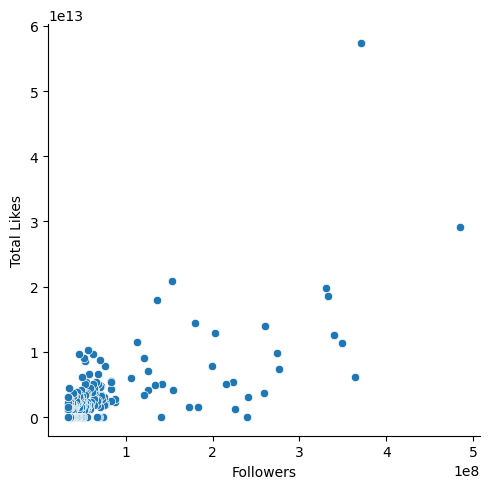

In [229]:

sns.relplot(data=df,x="Followers",y="Total Likes")

Followers and Influence socre shows linear relationship to each other -of value 0.66.

In [235]:
import matplotlib.pyplot as plt

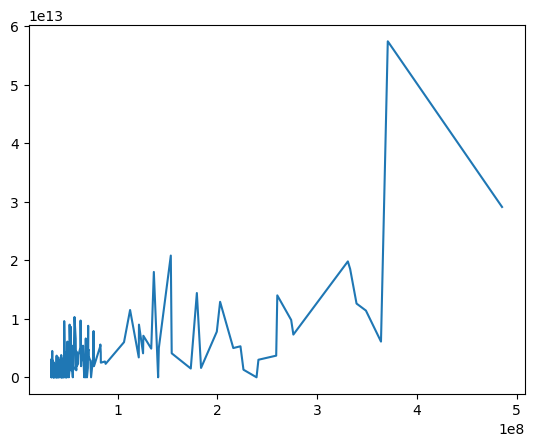

In [237]:
plt.plot("Followers","Total Likes",data=df)
plt.show()

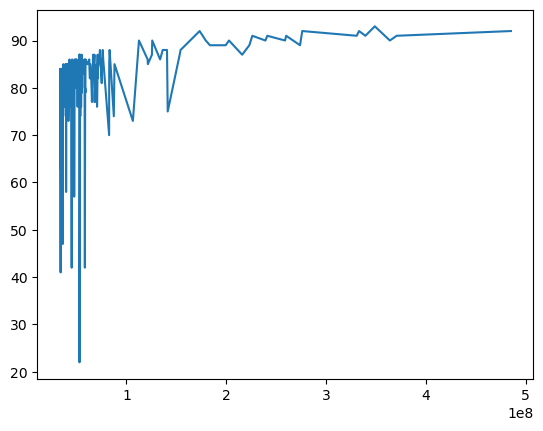

In [238]:
plt.plot("Followers","Influence Score",data=df)
plt.show()

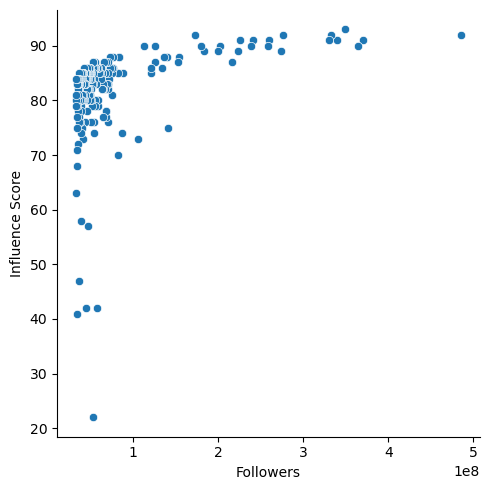

In [230]:
sns.relplot(data=df,x="Followers",y="Influence Score")

Followers and Influence Score are slightly Corelated to each other.

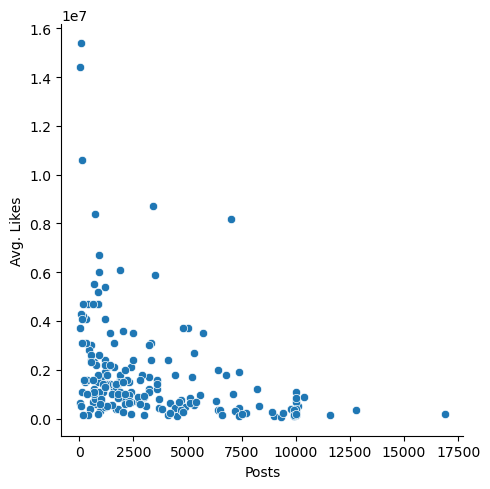

In [231]:
sns.relplot(data=df,x="Posts",y="Avg. Likes")

Posts and Avg Likes are slightly negatively Corelated.

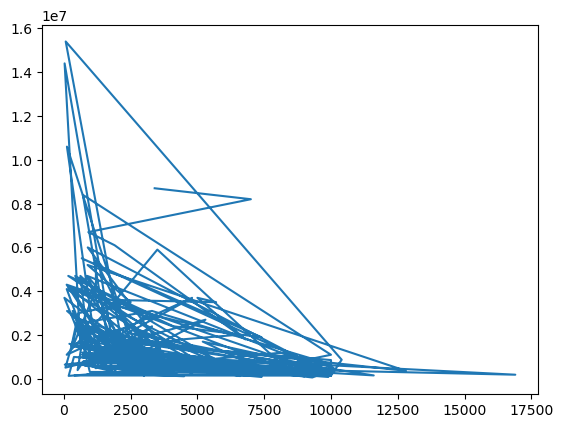

In [239]:
plt.plot("Posts","Avg. Likes",data=df)
plt.show()

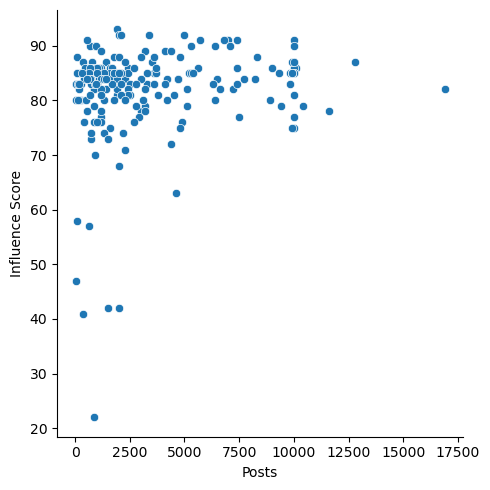

In [234]:
sns.relplot(data=df,x="Posts",y="Influence Score")

Posts and Influence Score is Not corelated to each other.

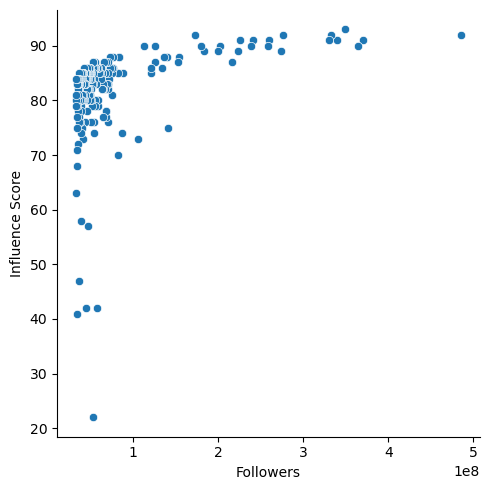

In [232]:
sns.relplot(data=df,x="Followers",y="Influence Score")

Followers and Influence Score are very slightly corelated

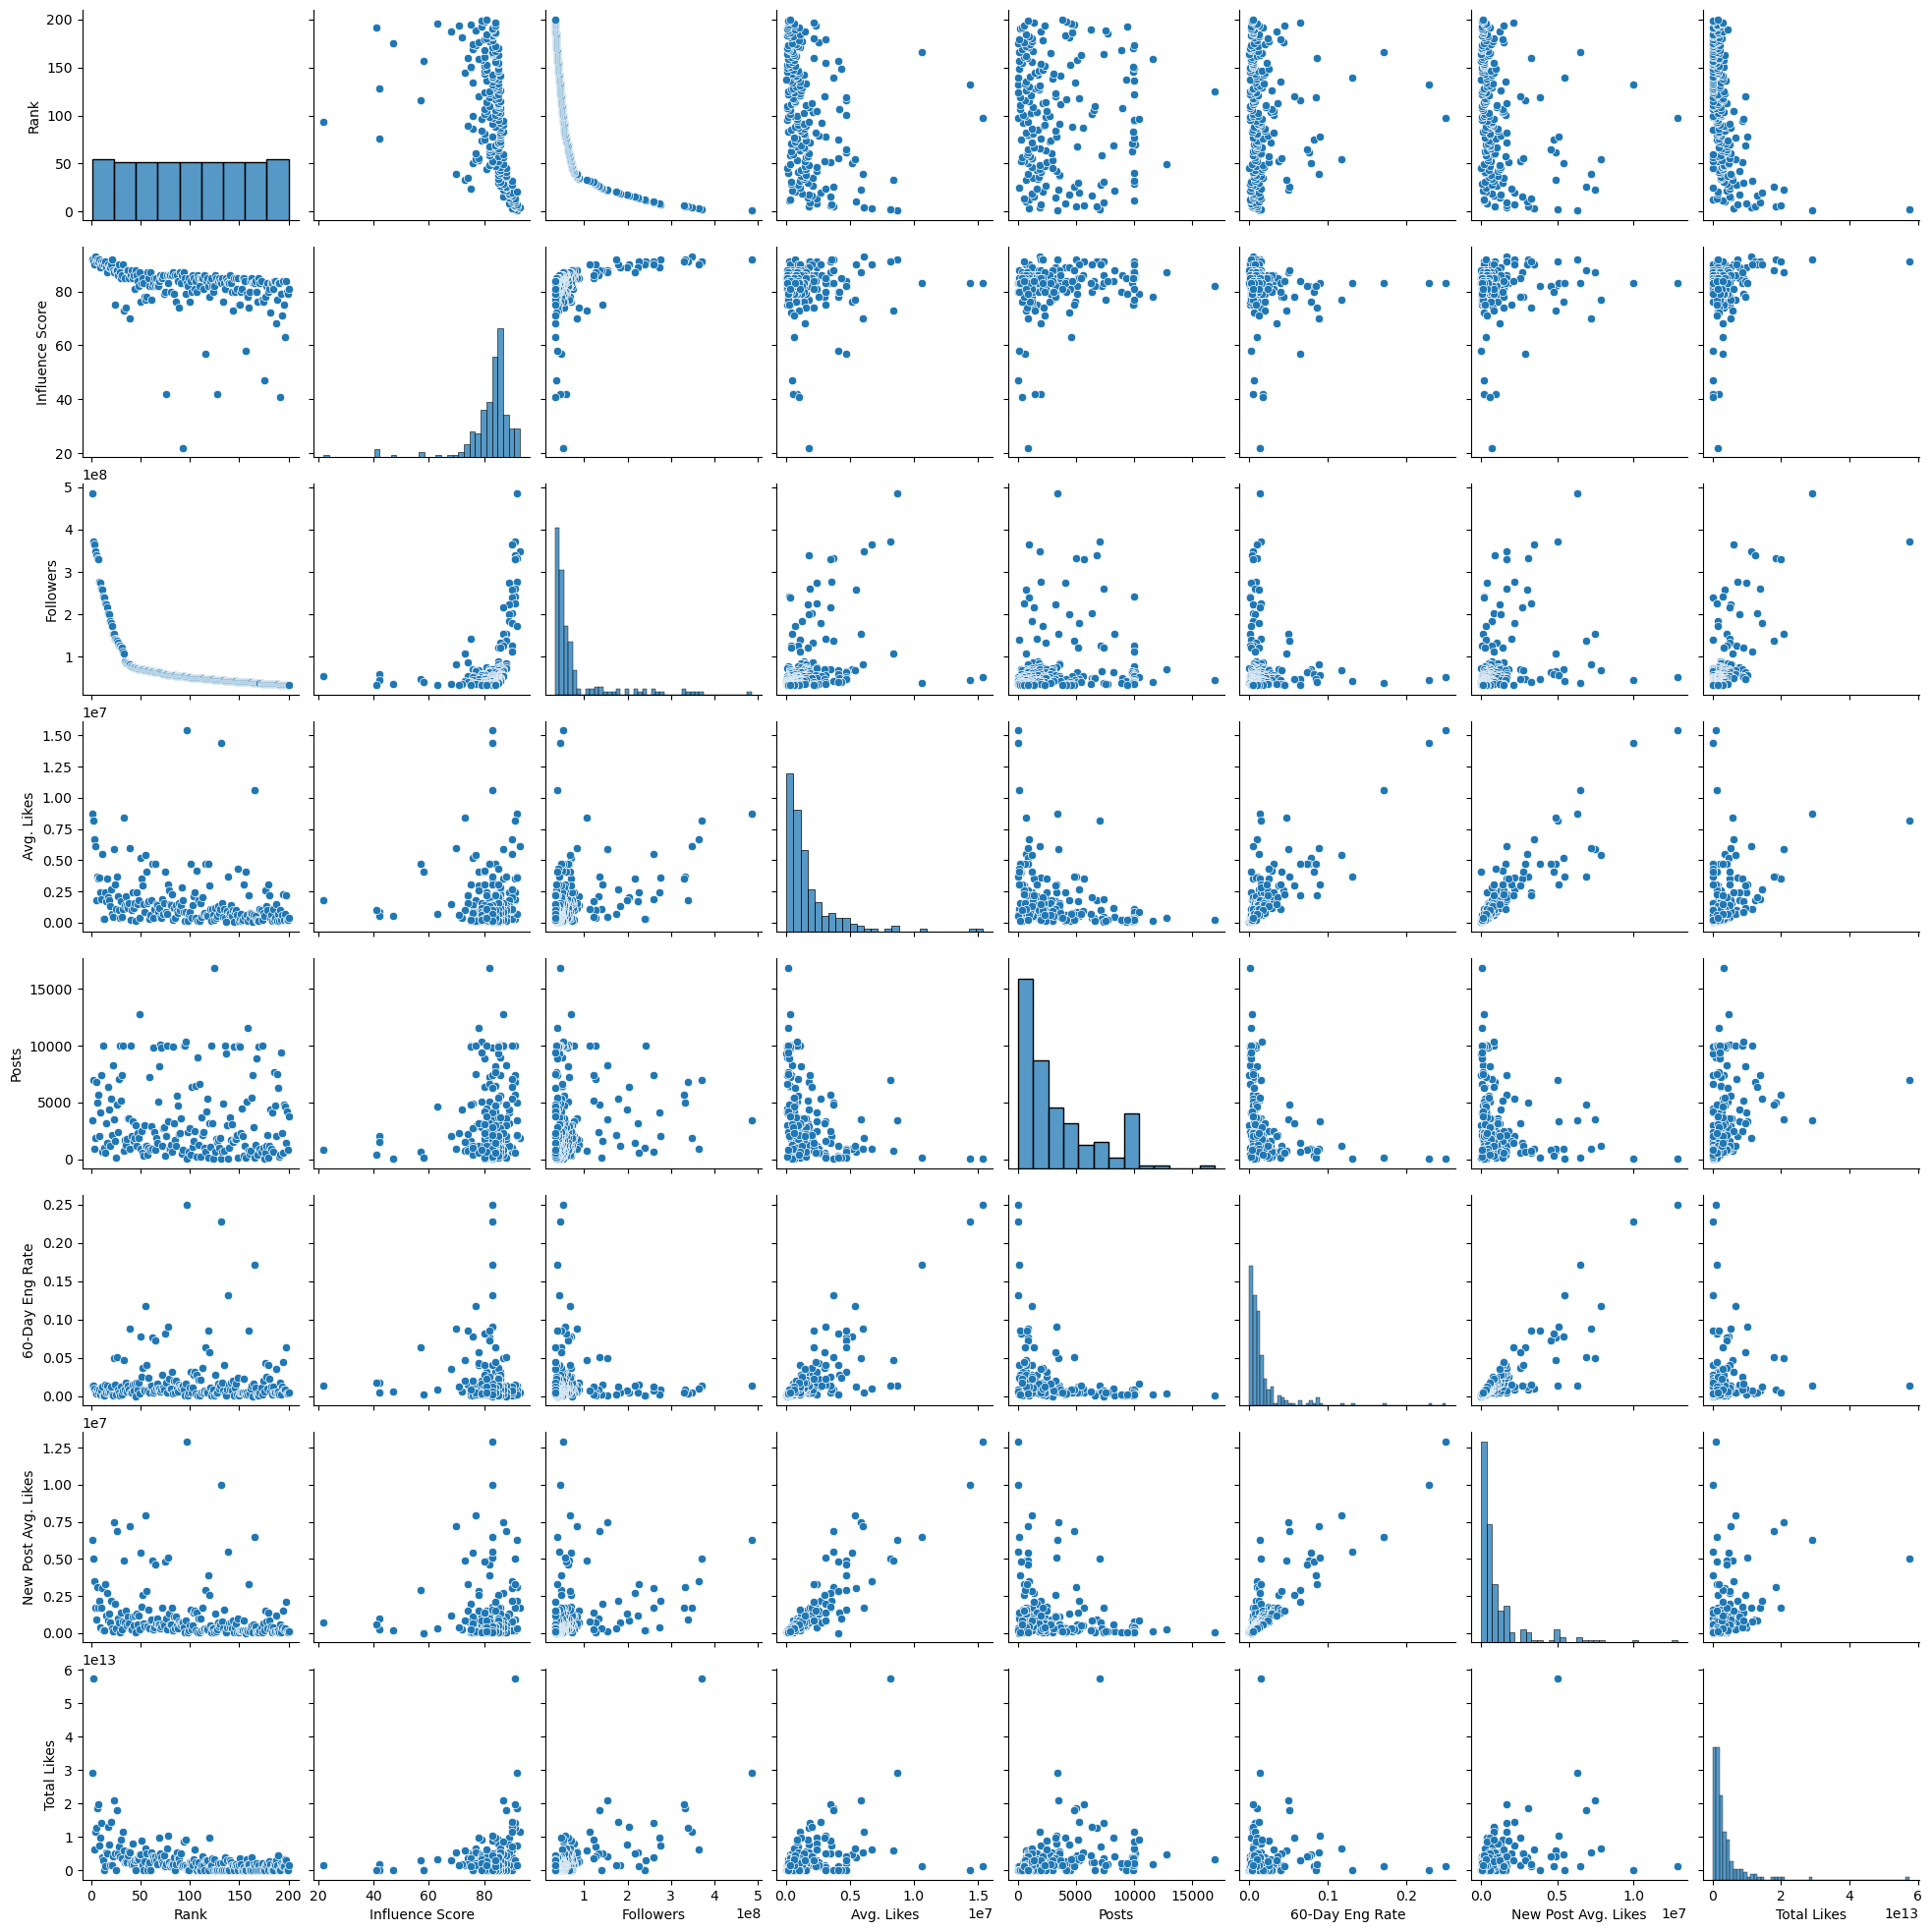

In [233]:
sns.pairplot(df)

In [35]:
df["Influence Score"].hist(by=df["Country Or Region"])

array([[<AxesSubplot:title={'center':'Anguilla'}>,
        <AxesSubplot:title={'center':'Australia'}>,
        <AxesSubplot:title={'center':'Brazil'}>,
        <AxesSubplot:title={'center':'British Virgin Islands'}>,
        <AxesSubplot:title={'center':'Canada'}>],
       [<AxesSubplot:title={'center':'Colombia'}>,
        <AxesSubplot:title={'center':'Czech Republic'}>,
        <AxesSubplot:title={'center':"CÃ´te d'Ivoire"}>,
        <AxesSubplot:title={'center':'France'}>,
        <AxesSubplot:title={'center':'Germany'}>],
       [<AxesSubplot:title={'center':'India'}>,
        <AxesSubplot:title={'center':'Indonesia'}>,
        <AxesSubplot:title={'center':'Italy'}>,
        <AxesSubplot:title={'center':'Mexico'}>,
        <AxesSubplot:title={'center':'Netherlands'}>],
       [<AxesSubplot:title={'center':'Puerto Rico'}>,
        <AxesSubplot:title={'center':'Russia'}>,
        <AxesSubplot:title={'center':'Spain'}>,
        <AxesSubplot:title={'center':'Sweden'}>,
        <AxesSub

Text(0.5, 0, 'Country Or Region')

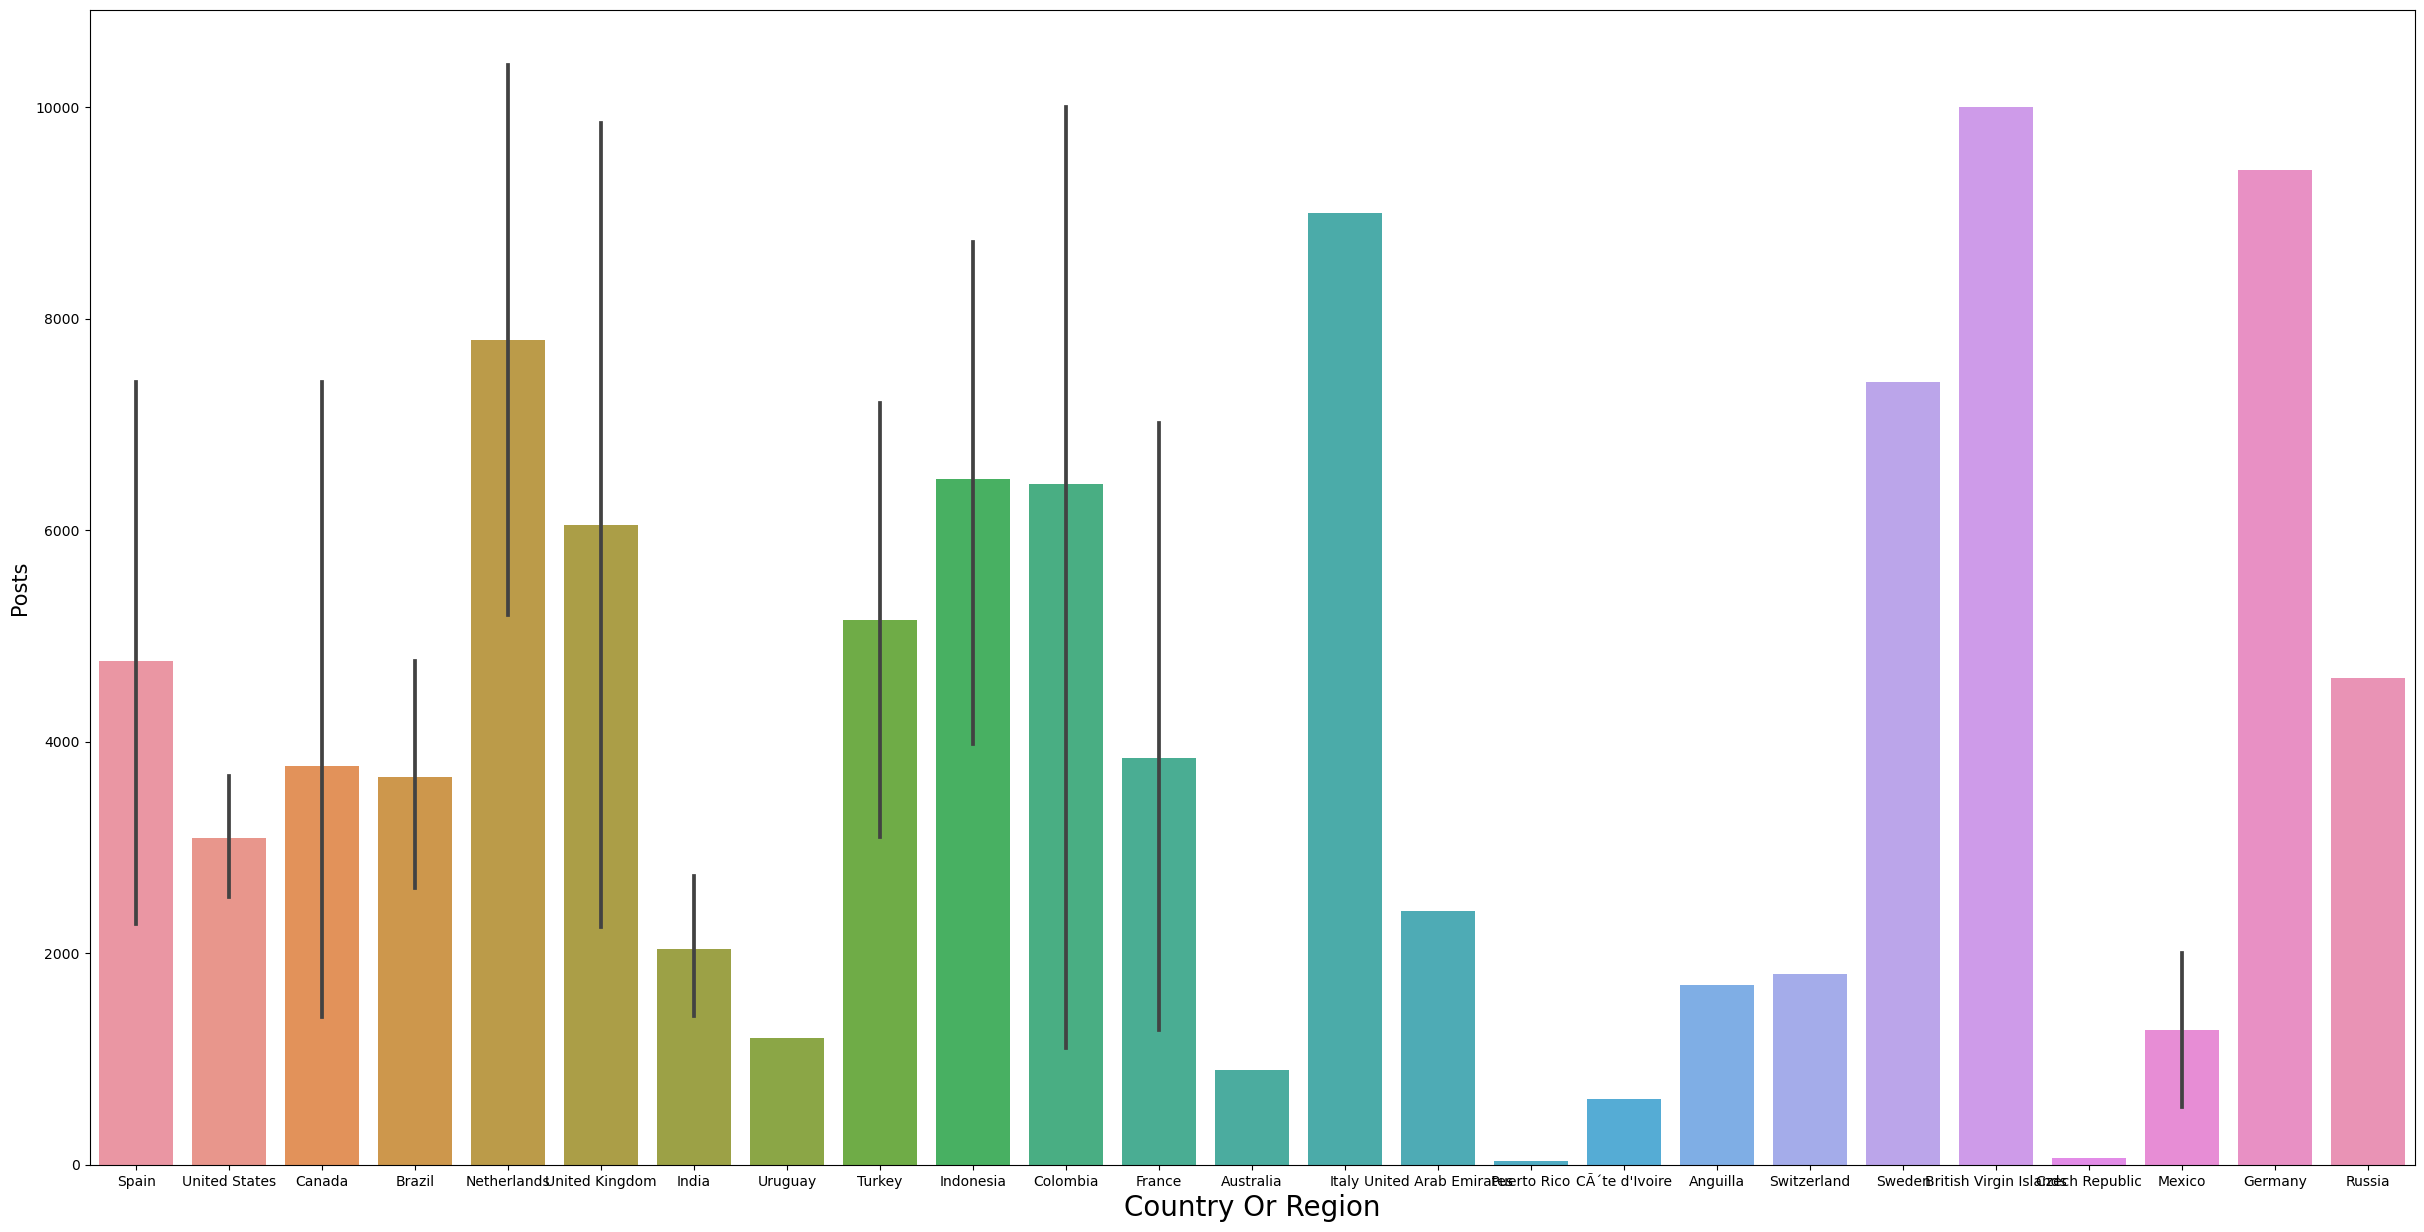

In [246]:
plt.figure(figsize=(30,15))
plots=sns.barplot(y="Posts",x="Country Or Region",data=df)
plt.ylabel("Posts",size=15)
plt.xlabel("Country Or Region",size=20)